In [9]:
from graph_tool.all import *
import time
import os

In [ ]:
from GithubGraphML.parsing.loading import load_csv_graph, load_csv_vertices, combine_graphs
data_dir = './data'

# Combine Graphs Test

In [11]:
G1 = Graph()
G1.add_edge(1, 2)
G1.add_edge(0, 1)
G1.ep['id'] = G1.new_ep('int')
G1.ep['id'][(1, 2)], G1.ep['id'][(0, 1)] = 1, 2
G1.ep['lan'] = G1.new_ep('string')
G1.ep['lan'][(1, 2)], G1.ep['lan'][(0, 1)] = 'python', 'pascal'
G1.ep['test'] = G1.new_ep('string')
G1.ep['test'][(1, 2)], G1.ep['test'][(0, 1)] = 'test1', 'test2'

G2 = Graph()
G2.add_edge(0, 1)
G2.ep['id'] = G2.new_ep('int', vals=[3])
G2.ep['lan'] = G2.new_ep('string', vals=['javascript'])

G3 = Graph()
G3.add_edge(0, 1)
G3.ep['id'] = G3.new_ep('int', vals=[4])
G3.ep['lan'] = G3.new_ep('string', vals=['assembly'])

G1.vp['name'] = G1.new_vp('string', vals=['1', '2', '3'])
G2.vp['name'] = G2.new_vp('string', vals=['1', '3'])
G3.vp['name'] = G3.new_vp('string', vals=['1', '4'])
G1.vp['test'] = G1.new_vp('string', vals=['test1', 'test2', 'test3'])
G2.vp['test'] = G2.new_vp('string', vals=['test1', 'test3'])
G3.vp['test'] = G3.new_vp('string', vals=['test1', 'test4'])


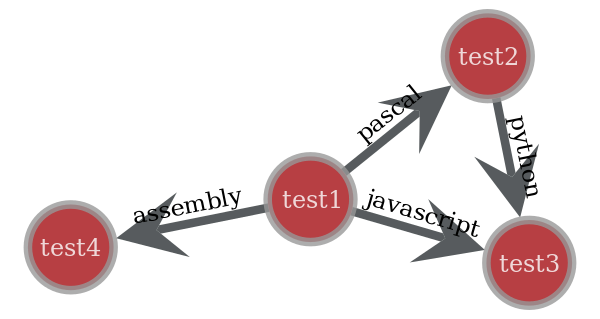

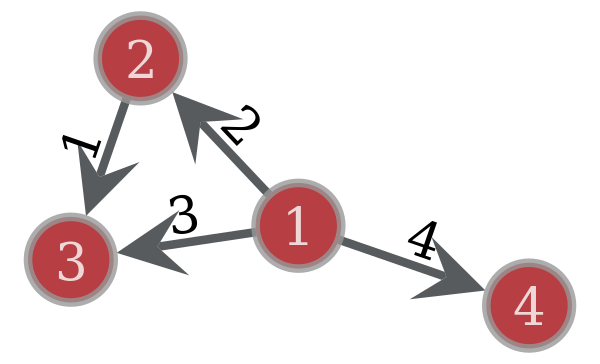

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc9dd57d3c0, at 0x7fc9dd338490>

In [12]:
G_comb, vp = combine_graphs([G1, G2, G3])
graph_draw(G_comb, vertex_text=G_comb.vp['test'], edge_text=G_comb.ep['lan'], output_size=(300, 300), vertex_font_size=12, edge_font_size=12)
graph_draw(G_comb, vertex_text=vp, edge_text=G_comb.ep['id'], output_size=(300, 300))

# CSV Loading Tests

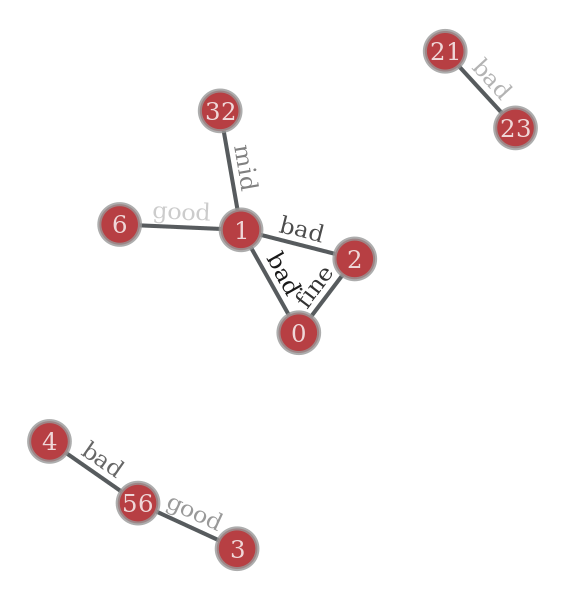

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fca65440250, at 0x7fc9dd587b20>

In [13]:
test_txt = """\
id1,id2,weight,class
0,1,0.1,bad
0,2,0.2,fine
1,2,0.3,bad
4,56,0.4,bad
32,1,0.5,mid
56,3,0.6,good
23,21,0.7,bad
6,1,0.8,good
"""
with open('test.csv', 'w') as f:
    f.write(test_txt)

Ge, vpe = load_csv_graph('test.csv', edge_indices=(0, 1), vprop_name='id')
Ge.set_directed(False)
os.remove('test.csv')
graph_draw(
    Ge, 
    output_size=(300, 300),
    ink_scale=0.75,
    vertex_text=Ge.vp['id'],
    edge_text_color=Ge.ep['weight'],
    edge_text=Ge.ep['class']
)

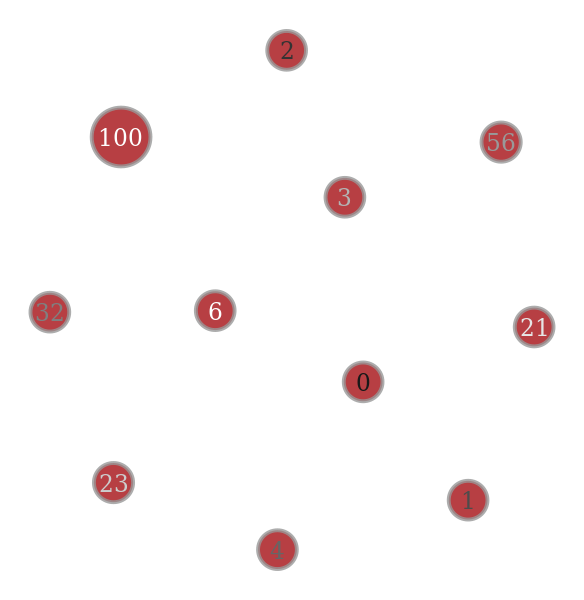

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc9dd338f40, at 0x7fc9dd587520>

In [14]:
test_txt = """\
id,weight,test
0,0.1,test1
2,0.2,test2
1,0.3,test3
4,0.4,test4
32,0.5,test5
56,0.6,test6
3,0.7,test7
23,0.8,test8
21,0.9,test9
6,1,test10
100,1,test100
"""
with open('test.csv', 'w') as f:
    f.write(test_txt)

Gv, vpv = load_csv_vertices('test.csv', vertex_index=0, vprop_name='id')
Gv.set_directed(False)
os.remove('test.csv')
graph_draw(
    Gv, 
    output_size=(300, 300),
    ink_scale=0.75,
    vertex_text=Gv.vp['id'],
    vertex_text_color=Gv.vp['weight'],
)

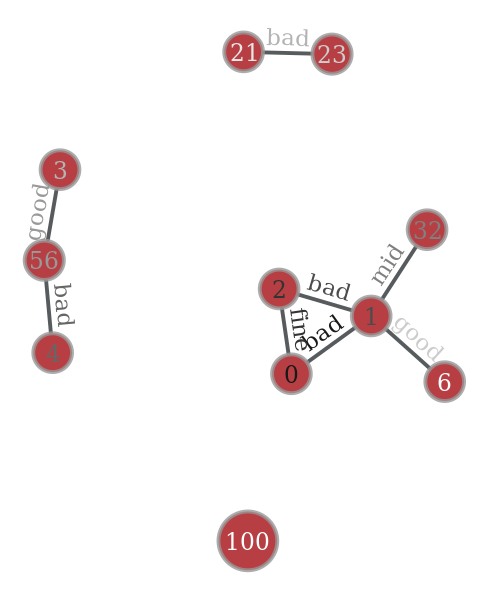

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7fc9dd587700, at 0x7fc9dd578a60>

In [15]:
G, vp = combine_graphs([Ge, Gv], vprop_name='id')
graph_draw(
    G, 
    output_size=(300, 300),
    ink_scale=0.75,
    vertex_text=G.vp['id'],
    vertex_text_color=G.vp['weight'],
    edge_text_color=G.ep['weight'],
    edge_text=G.ep['class']
)

# CSV Loading Preformance Tests

In [16]:
start_time = time.time()
G_native, vp_native = load_csv_graph(f"{data_dir}/developers_social_network/PERL_developers_social_network.csv", (1, 2))
end_time = time.time()
print('runtime:', end_time - start_time)

runtime: 1.6129884719848633


In [17]:
start_time = time.time()
G_gt = load_graph_from_csv(f"{data_dir}/developers_social_network/PERL_developers_social_network.csv", ecols=(1, 2), hashed=True, skip_first=True)
end_time = time.time()
print('runtime:', end_time - start_time)

runtime: 1.5957057476043701


In [18]:
def are_graphs_equivalent(g1, g2):
    if g1.num_vertices() != g2.num_vertices() or g1.num_edges() != g2.num_edges():
        return False
    
    # Compare vertex properties (attributes)
    for v1, v2 in zip(g1.vertices(), g2.vertices()):
        for prop_name in g1.vp.keys():
            if g1.vp[prop_name][v1] != g2.vp[prop_name][v2]:
                return False
    
    # Compare edge properties (attributes)
    for e1, e2 in zip(g1.edges(), g2.edges()):
        if e1.source() != e2.source() or e1.target() != e2.target():
            return False
        for prop_name in g1.ep.keys():
            if g1.ep[prop_name][e1] != g2.ep[prop_name][e2]:
                return False

    return True

are_graphs_equivalent(G_native, G_gt)

True

# Graph Save / Load Preformance Tests

In [19]:
import pickle

start_time = time.time()
with open('graph.pkl', 'wb') as f:
    pickle.dump(G_gt, f)
end_time = time.time()
print('save time:', end_time - start_time)
start_time = time.time()
with open('graph.pkl', 'rb') as f:
    g_loaded = pickle.load(f)
end_time = time.time()
print('load time:', end_time - start_time)
os.remove('graph.pkl')
are_graphs_equivalent(G_gt, g_loaded)


save time: 0.09365344047546387
load time: 0.12481570243835449


True

In [20]:
start_time = time.time()
G_gt.save("graph.graphml")
end_time = time.time()
print('save time:', end_time - start_time)
start_time = time.time()
g_loaded = load_graph("graph.graphml")
end_time = time.time()
print('load time:', end_time - start_time)
os.remove('graph.graphml')
are_graphs_equivalent(G_gt, g_loaded)

save time: 1.4668126106262207
load time: 1.3923125267028809


True